In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [18]:
df = pd.read_csv('../Data/train.csv')
df.columns = [x.strip() for x in df.columns]
orig_df = df.copy()
df

,Id,AB,AF,AH,AM,AR,AX,AY,AZ,BC,...,FL,FR,FS,GB,GE,GF,GH,GI,GL,Class
0,000ff2bfdfe9,0.209377,3109.03329,85.200147,22.394407,8.138688,0.699861,0.025578,9.812214,5.555634,...,7.298162,1.73855,0.094822,11.339138,72.611063,2003.810319,22.136229,69.834944,0.120343,1
1,007255e47698,0.145282,978.76416,85.200147,36.968889,8.138688,3.632190,0.025578,13.517790,1.229900,...,0.173229,0.49706,0.568932,9.292698,72.611063,27981.562750,29.135430,32.131996,21.978000,0
2,013f2bd269f5,0.470030,2635.10654,85.200147,32.360553,8.138688,6.732840,0.025578,12.824570,1.229900,...,7.709560,0.97556,1.198821,37.077772,88.609437,13676.957810,28.022851,35.192676,0.196941,0
3,043ac50845d5,0.252107,3819.65177,120.201618,77.112203,8.138688,3.685344,0.025578,11.053708,1.229900,...,6.122162,0.49706,0.284466,18.529584,82.416803,2094.262452,39.948656,90.493248,0.155829,0
4,044fb8a146ec,0.380297,3733.04844,85.200147,14.103738,8.138688,3.942255,0.054810,3.396778,102.151980,...,8.153058,48.50134,0.121914,16.408728,146.109943,8524.370502,45.381316,36.262628,0.096614,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,fd3dafe738fd,0.149555,3130.05946,123.763599,9.513984,13.020852,3.499305,0.077343,8.545512,2.804172,...,0.173229,1.26092,0.067730,8.967128,217.148554,8095.932828,24.640462,69.191944,21.978000,0
613,fd895603f071,0.435846,5462.03438,85.200147,46.551007,15.973224,5.979825,0.025882,12.622906,3.777550,...,10.223150,1.24236,0.426699,35.896418,496.994214,3085.308063,29.648928,124.808872,0.145340,0
614,fd8ef6377f76,0.427300,2459.10720,130.138587,55.355778,10.005552,8.070549,0.025578,15.408390,1.229900,...,0.173229,0.49706,0.067730,19.962092,128.896894,6474.652866,26.166072,119.559420,21.978000,0
615,fe1942975e40,0.363205,1263.53524,85.200147,23.685856,8.138688,7.981959,0.025578,7.524588,1.229900,...,9.256996,0.78764,0.670527,24.594488,72.611063,1965.343176,25.116750,37.155112,0.184622,0


In [19]:
nulls = pd.DataFrame(df.isnull().sum(), columns=['nulls']).reset_index().rename(columns={'index': 'column'})
nulls = nulls[nulls['nulls'] > 0]
null_columns = nulls['column'].tolist()

In [20]:
for x in null_columns:
    df.loc[df[x].isnull(), x] = df[x].mean()


In [21]:
corrs = []
for column in df.columns:
    if column not in ['EJ', 'Id']:
        correlation, p_value = stats.pointbiserialr(df[column], df['Class'])
        entry = {
            'column_name': column,
            'correlation': correlation,
            'p_value': p_value
        }
        corrs.append(entry)
        print(f"{column}:"
              f" {correlation}")

corrs = pd.DataFrame(corrs)

AB: 0.2806118820146079
AF: 0.3026384529570624
AH: 0.044645463137591664
AM: 0.2391699315624165
AR: 0.06438034287892734
AX: 0.09761578296404433
AY: 0.0824203665339819
AZ: 0.01351560698195114
BC: 0.1558815349542316
BD: 0.11218407269891816
BN: 0.19828288876105454
BP: 0.15728644290909422
BQ: 0.27802415305134387
BR: 0.0885535625511284
BZ: 0.1124233048901998
CB: -0.01477239401824388
CC: -0.0544949242301765
CD: 0.17130354932075295
CF: 0.10974774612045447
CH: 0.008144308808507049
CL: 0.016852143236700503
CR: -0.2275465927678717
CS: -0.04743807484657195
CU: -0.08318486460783595
CW: -0.06263911121471359
DA: -0.2046120370858706
DE: -0.12497729147482396
DF: 0.06427208885747934
DH: -0.20683924540057622
DI: 0.2607598057198681
DL: -0.14771602038439652
DN: -0.00847774995098777
DU: 0.26095548220714354
DV: 0.015477478340990329
DY: 0.06273384140485691
EB: 0.08800491810535993
EE: -0.13532354428920082
EG: -0.024609863760996546
EH: 0.1798553067203793
EL: 0.06570828365713324
EP: -0.06838258959996751
EU: -0.03

In [22]:
corrs['abs'] = abs(corrs['correlation'])
corrs = corrs.sort_values(by='abs', ascending=False)
corrs = corrs[corrs['p_value'] < 0.05]
corrs

,column_name,correlation,p_value,abs
55,Class,1.000000,0.000000e+00,1.000000
1,AF,0.302638,1.553680e-14,0.302638
0,AB,0.280612,1.254394e-12,0.280612
12,BQ,0.278024,2.049719e-12,0.278024
32,DU,0.260955,4.602489e-11,0.260955
29,DI,0.260760,4.763578e-11,0.260760
46,FL,0.244143,7.979747e-10,0.244143
3,AM,0.239170,1.784037e-09,0.239170
21,CR,-0.227547,1.091725e-08,0.227547
44,FE,0.216359,5.706254e-08,0.216359


In [23]:
corr_columns = corrs['column_name'].to_list()

In [24]:
corr_columns.append('EJ')
corr_df = df[corr_columns]

array([[<AxesSubplot:title={'center':'Class'}>,
        <AxesSubplot:title={'center':'AF'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'BQ'}>,
        <AxesSubplot:title={'center':'DU'}>,
        <AxesSubplot:title={'center':'DI'}>],
       [<AxesSubplot:title={'center':'FL'}>,
        <AxesSubplot:title={'center':'AM'}>,
        <AxesSubplot:title={'center':'CR'}>,
        <AxesSubplot:title={'center':'FE'}>,
        <AxesSubplot:title={'center':'DH'}>,
        <AxesSubplot:title={'center':'DA'}>],
       [<AxesSubplot:title={'center':'BN'}>,
        <AxesSubplot:title={'center':'EH'}>,
        <AxesSubplot:title={'center':'CD'}>,
        <AxesSubplot:title={'center':'BP'}>,
        <AxesSubplot:title={'center':'BC'}>,
        <AxesSubplot:title={'center':'DL'}>],
       [<AxesSubplot:title={'center':'EE'}>,
        <AxesSubplot:title={'center':'FD'}>,
        <AxesSubplot:title={'center':'GF'}>,
        <AxesSubplot:title={'center':'DE'}>,
    

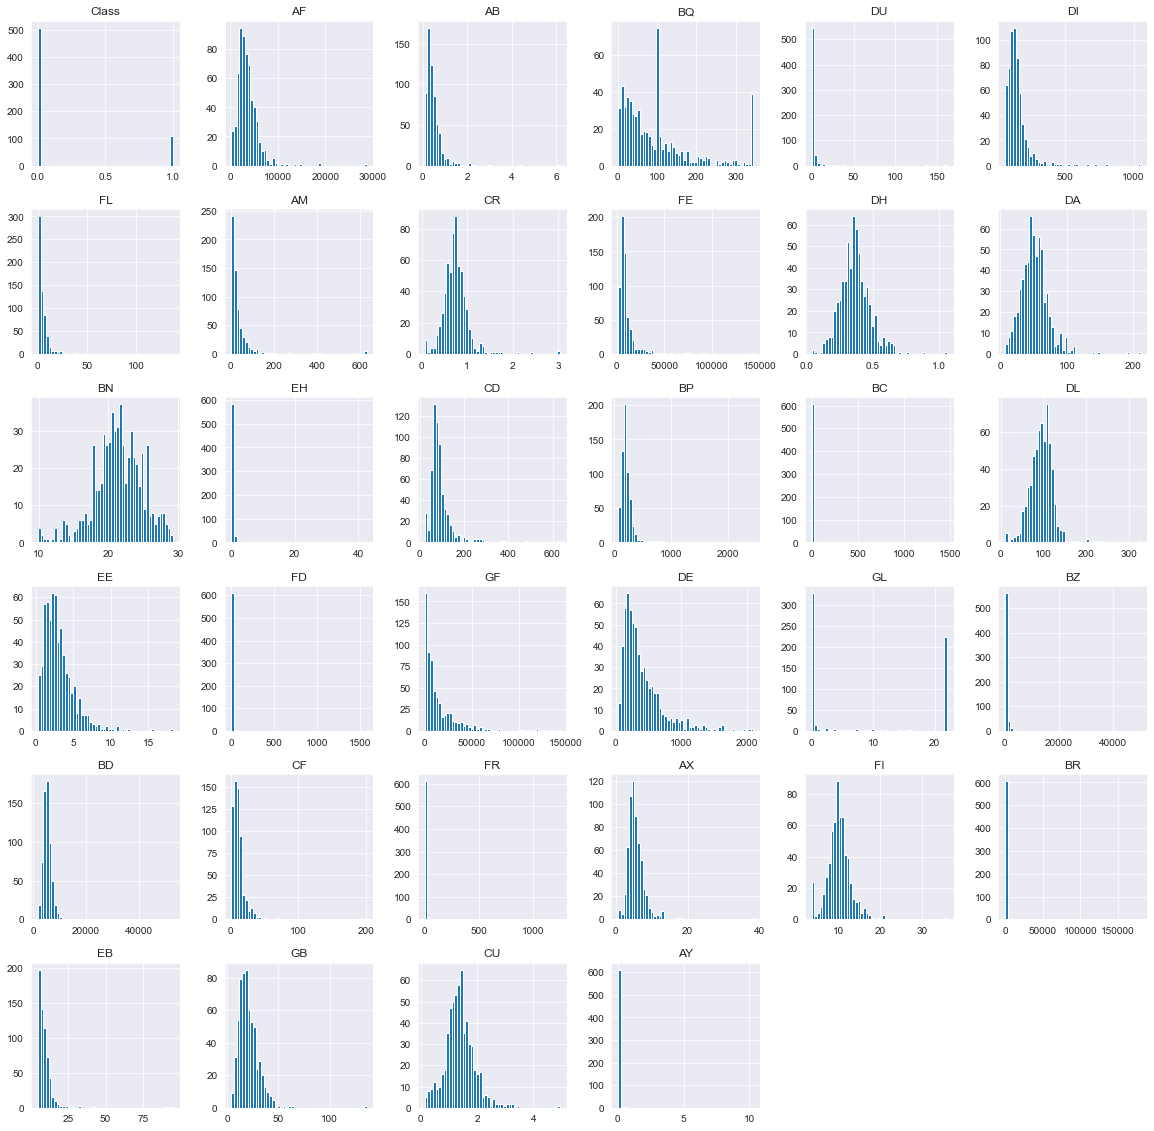

In [25]:
corr_df.hist(figsize=(20,20), bins=50)

In [26]:
used_cols = [
    'Id',
    'AF',
    'AB',
    'BQ',
    'DI',
    'FL',
    'AM',
    'CR',
    'FE',
    'DH',
    'DA',
    'BN',
    'CD',
    'BP',
    'DL',
    'EE',
    'GF',
    'DE',
    'BD',
    'CF',
    'AX',
    'FI',
    'EB',
    'GB',
    'CU',
    'EJ',
    'Class']

In [27]:
df = df[used_cols]

array([[<AxesSubplot:title={'center':'AF'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'BQ'}>,
        <AxesSubplot:title={'center':'DI'}>,
        <AxesSubplot:title={'center':'FL'}>],
       [<AxesSubplot:title={'center':'AM'}>,
        <AxesSubplot:title={'center':'CR'}>,
        <AxesSubplot:title={'center':'FE'}>,
        <AxesSubplot:title={'center':'DH'}>,
        <AxesSubplot:title={'center':'DA'}>],
       [<AxesSubplot:title={'center':'BN'}>,
        <AxesSubplot:title={'center':'CD'}>,
        <AxesSubplot:title={'center':'BP'}>,
        <AxesSubplot:title={'center':'DL'}>,
        <AxesSubplot:title={'center':'EE'}>],
       [<AxesSubplot:title={'center':'GF'}>,
        <AxesSubplot:title={'center':'DE'}>,
        <AxesSubplot:title={'center':'BD'}>,
        <AxesSubplot:title={'center':'CF'}>,
        <AxesSubplot:title={'center':'AX'}>],
       [<AxesSubplot:title={'center':'FI'}>,
        <AxesSubplot:title={'center':'EB'}>,
      

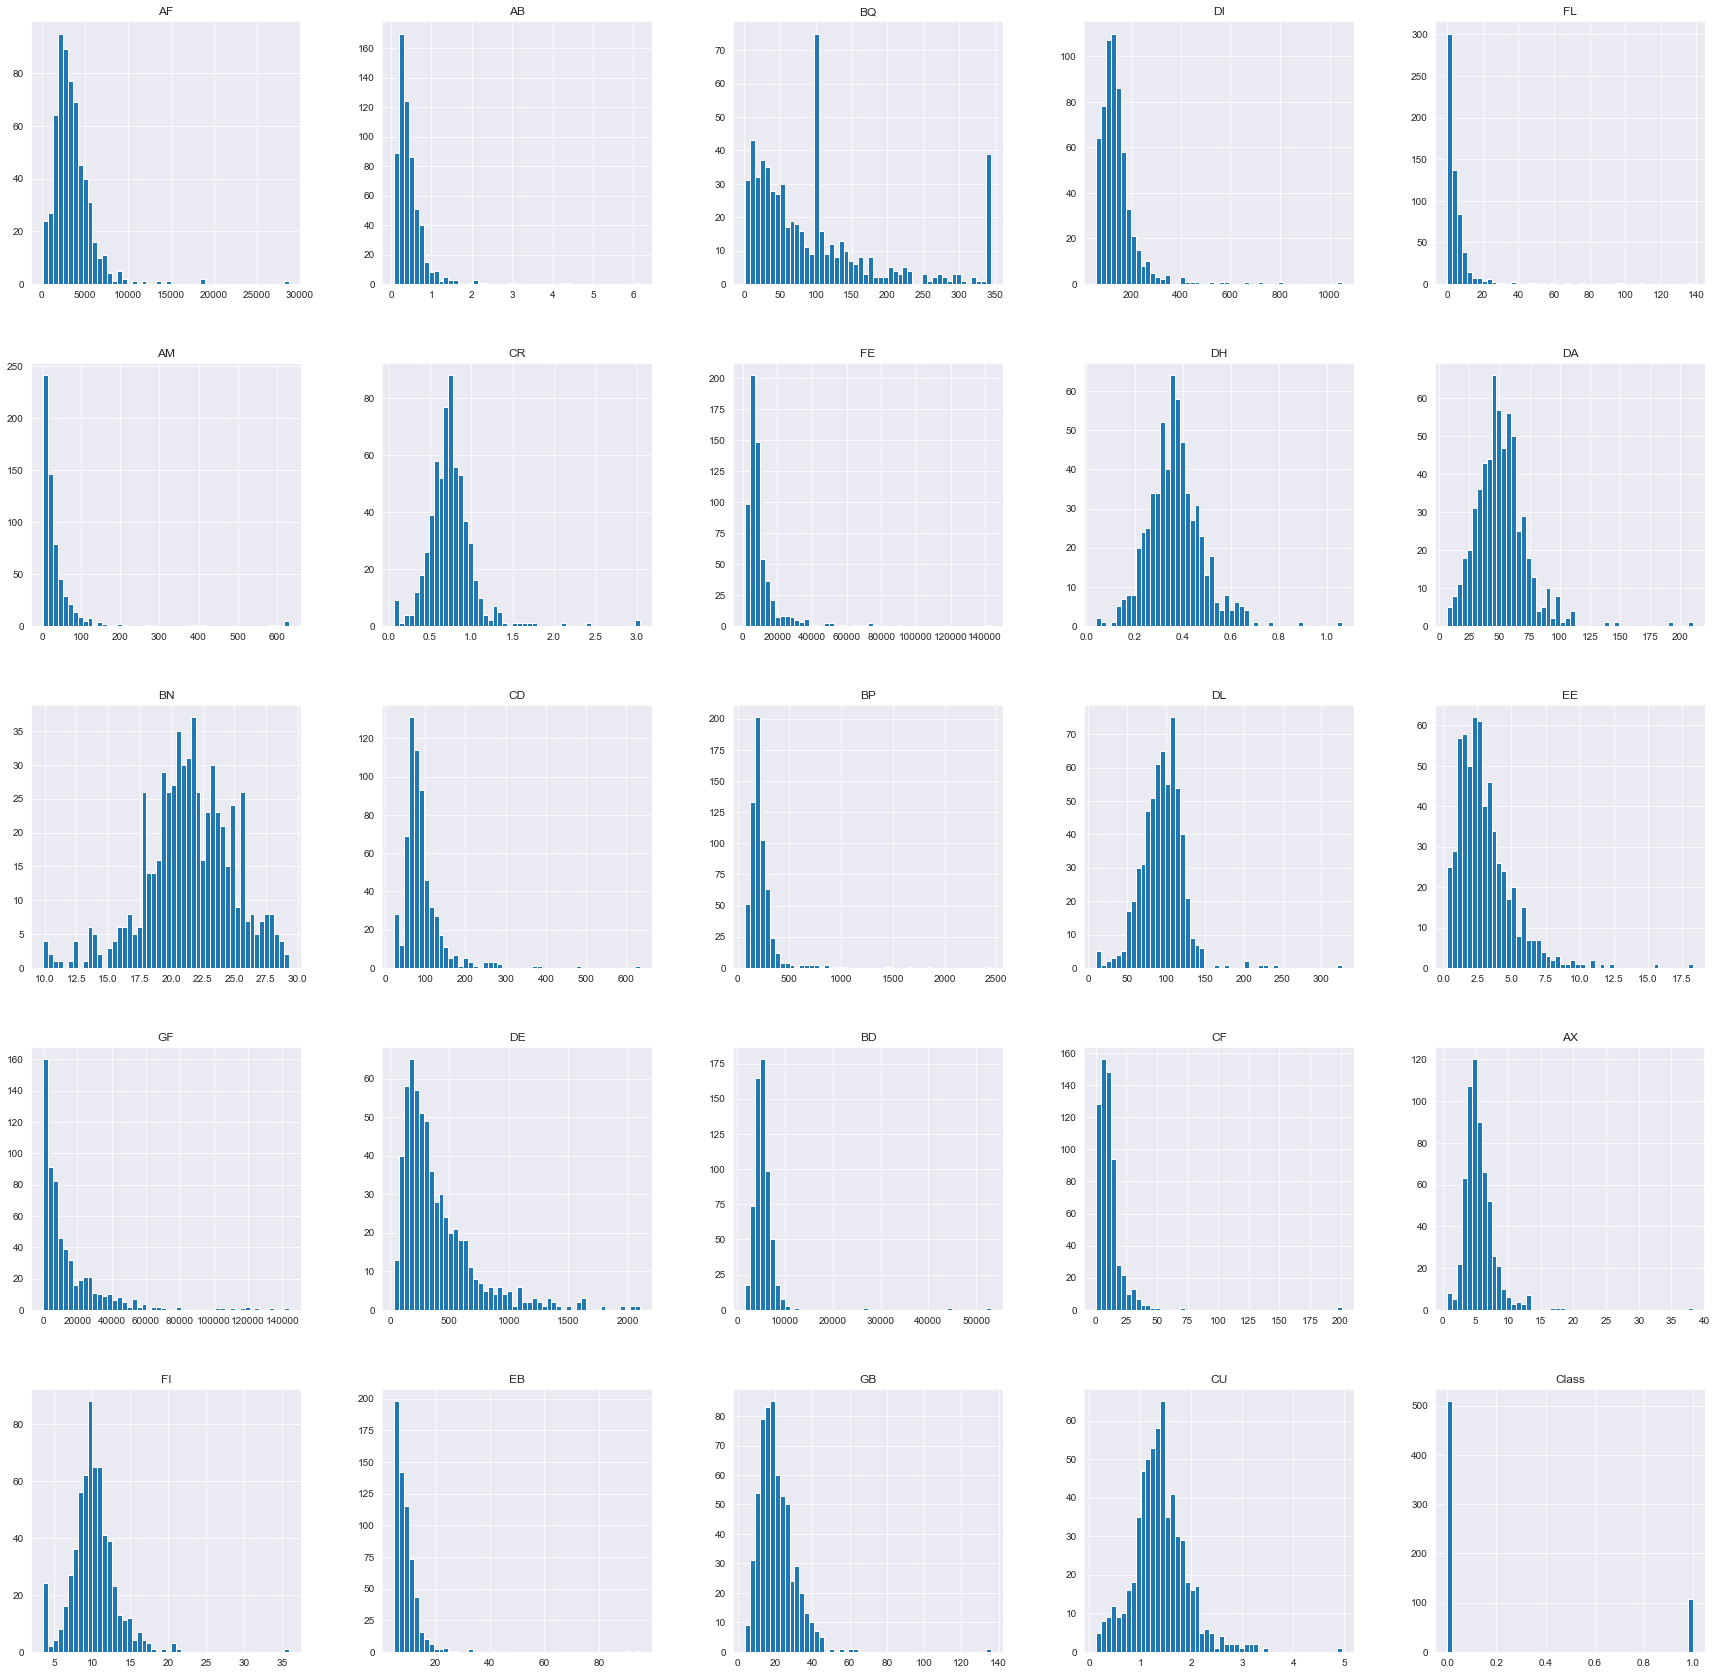

In [28]:
df.hist(figsize=(30,30), bins=50)

In [29]:
for x in df.columns:
    if x not in ['Id', 'EJ', 'Class']:
        z_scores = stats.zscore(df[x])
        threshold = 3  # Adjust the threshold as per your requirement
        outliers = np.abs(z_scores) > threshold
        df = df[~outliers]

array([[<AxesSubplot:title={'center':'AF'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'BQ'}>,
        <AxesSubplot:title={'center':'DI'}>,
        <AxesSubplot:title={'center':'FL'}>],
       [<AxesSubplot:title={'center':'AM'}>,
        <AxesSubplot:title={'center':'CR'}>,
        <AxesSubplot:title={'center':'FE'}>,
        <AxesSubplot:title={'center':'DH'}>,
        <AxesSubplot:title={'center':'DA'}>],
       [<AxesSubplot:title={'center':'BN'}>,
        <AxesSubplot:title={'center':'CD'}>,
        <AxesSubplot:title={'center':'BP'}>,
        <AxesSubplot:title={'center':'DL'}>,
        <AxesSubplot:title={'center':'EE'}>],
       [<AxesSubplot:title={'center':'GF'}>,
        <AxesSubplot:title={'center':'DE'}>,
        <AxesSubplot:title={'center':'BD'}>,
        <AxesSubplot:title={'center':'CF'}>,
        <AxesSubplot:title={'center':'AX'}>],
       [<AxesSubplot:title={'center':'FI'}>,
        <AxesSubplot:title={'center':'EB'}>,
      

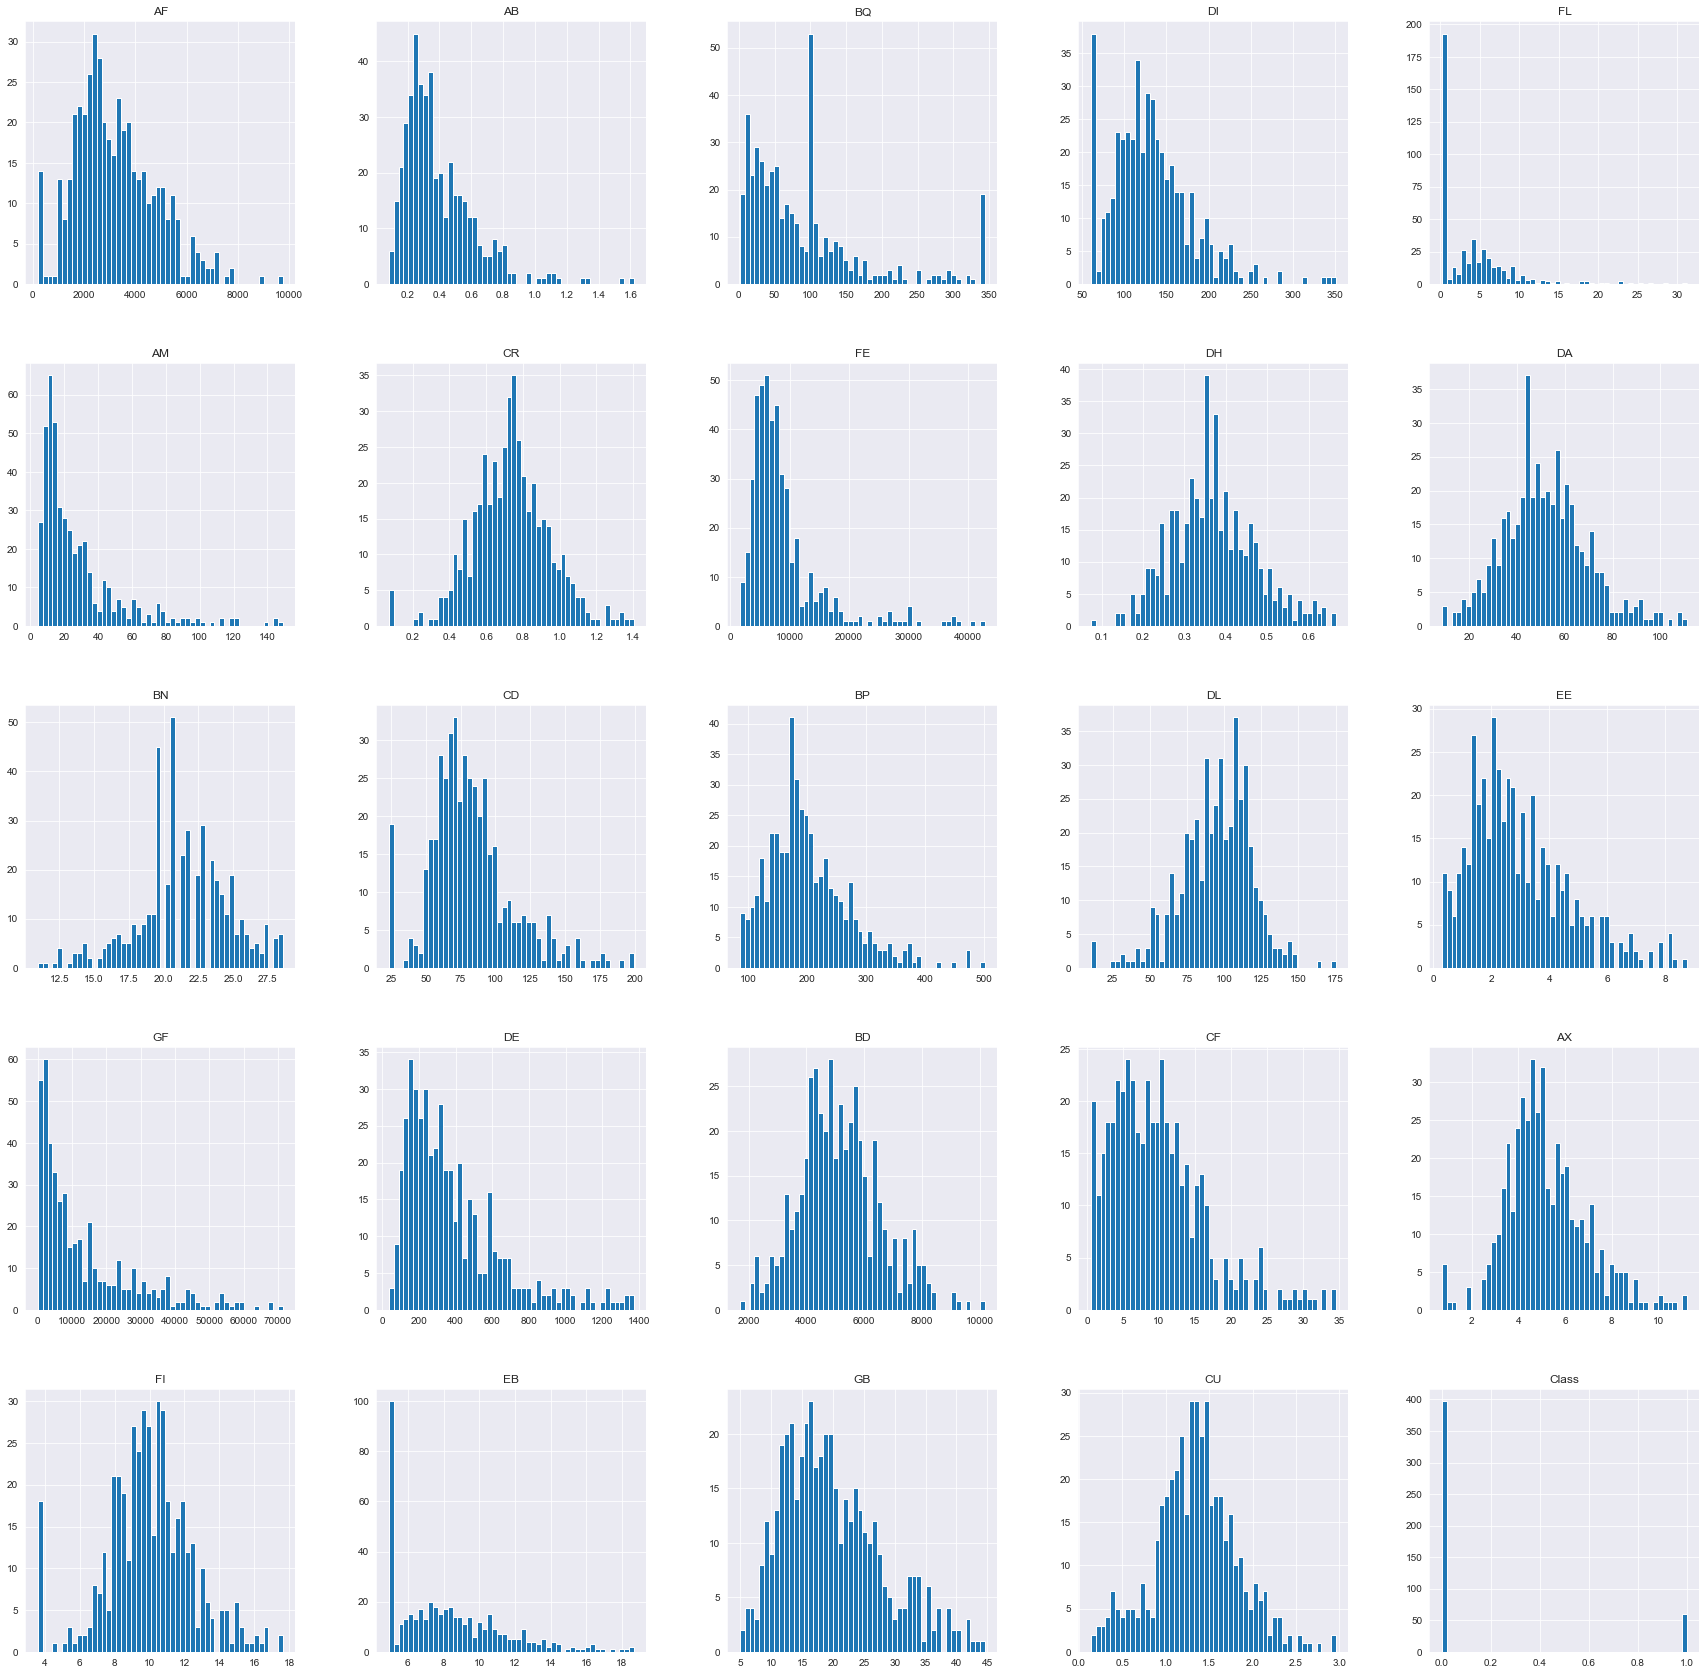

In [30]:
#df = df[~outliers]
df.hist(figsize=(30,30), bins=50)

In [31]:
right_skewed_columns = [
    'AF',
    'AB',
    'BQ',
    'DI',
    'AM',
    'EE',
    'GF',
    'DE',
    'CF',
    'EB',
    'FE',
    'GB'
]

<AxesSubplot:>

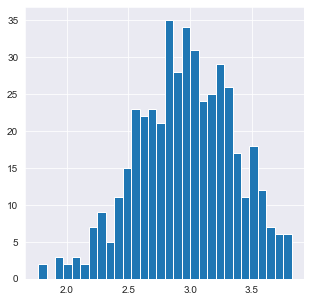

In [32]:
column = 'GB'
log = np.log1p(df[column])
square_root = np.sqrt(df[column])
boxcox, b_lmda = stats.boxcox(df[column])
boxcox = pd.Series(boxcox)
yeo, yeo_lmda = stats.yeojohnson(df[column])
yeo = pd.Series(yeo)

log.hist(figsize=(5, 5), bins=30)

<AxesSubplot:>

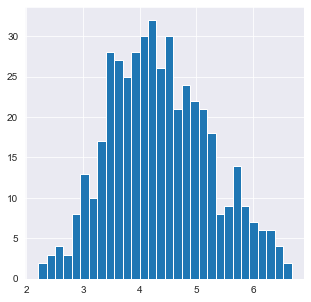

In [33]:
square_root.hist(figsize=(5,5), bins=30)

<AxesSubplot:>

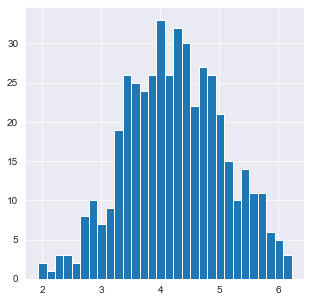

In [34]:
boxcox.hist(figsize=(5,5), bins=30)

<AxesSubplot:>

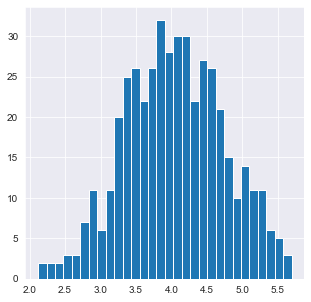

In [35]:
yeo.hist(figsize=(5,5), bins=30)

In [36]:
log_cols = [
    'DI',
    'EE'
]

sqrt_cols = [
    'AF'
]

boxcox_cols = [
    'AB',
    'BQ',
    'DE',
    'EB',
    'FE',
    'GB'
]

yeo_cols = [
    'AM',
    'GF',
    'CF'
]

In [37]:
df[log_cols] = np.log1p(df[log_cols])
df[sqrt_cols] = np.sqrt(df[sqrt_cols])

for x in boxcox_cols:
    df[x], lmbda = stats.boxcox(df[x])

for x in yeo_cols:
    df[x], lmbda = stats.yeojohnson(df[x])

array([[<AxesSubplot:title={'center':'AF'}>,
        <AxesSubplot:title={'center':'AB'}>,
        <AxesSubplot:title={'center':'BQ'}>,
        <AxesSubplot:title={'center':'DI'}>,
        <AxesSubplot:title={'center':'FL'}>],
       [<AxesSubplot:title={'center':'AM'}>,
        <AxesSubplot:title={'center':'CR'}>,
        <AxesSubplot:title={'center':'FE'}>,
        <AxesSubplot:title={'center':'DH'}>,
        <AxesSubplot:title={'center':'DA'}>],
       [<AxesSubplot:title={'center':'BN'}>,
        <AxesSubplot:title={'center':'CD'}>,
        <AxesSubplot:title={'center':'BP'}>,
        <AxesSubplot:title={'center':'DL'}>,
        <AxesSubplot:title={'center':'EE'}>],
       [<AxesSubplot:title={'center':'GF'}>,
        <AxesSubplot:title={'center':'DE'}>,
        <AxesSubplot:title={'center':'BD'}>,
        <AxesSubplot:title={'center':'CF'}>,
        <AxesSubplot:title={'center':'AX'}>],
       [<AxesSubplot:title={'center':'FI'}>,
        <AxesSubplot:title={'center':'EB'}>,
      

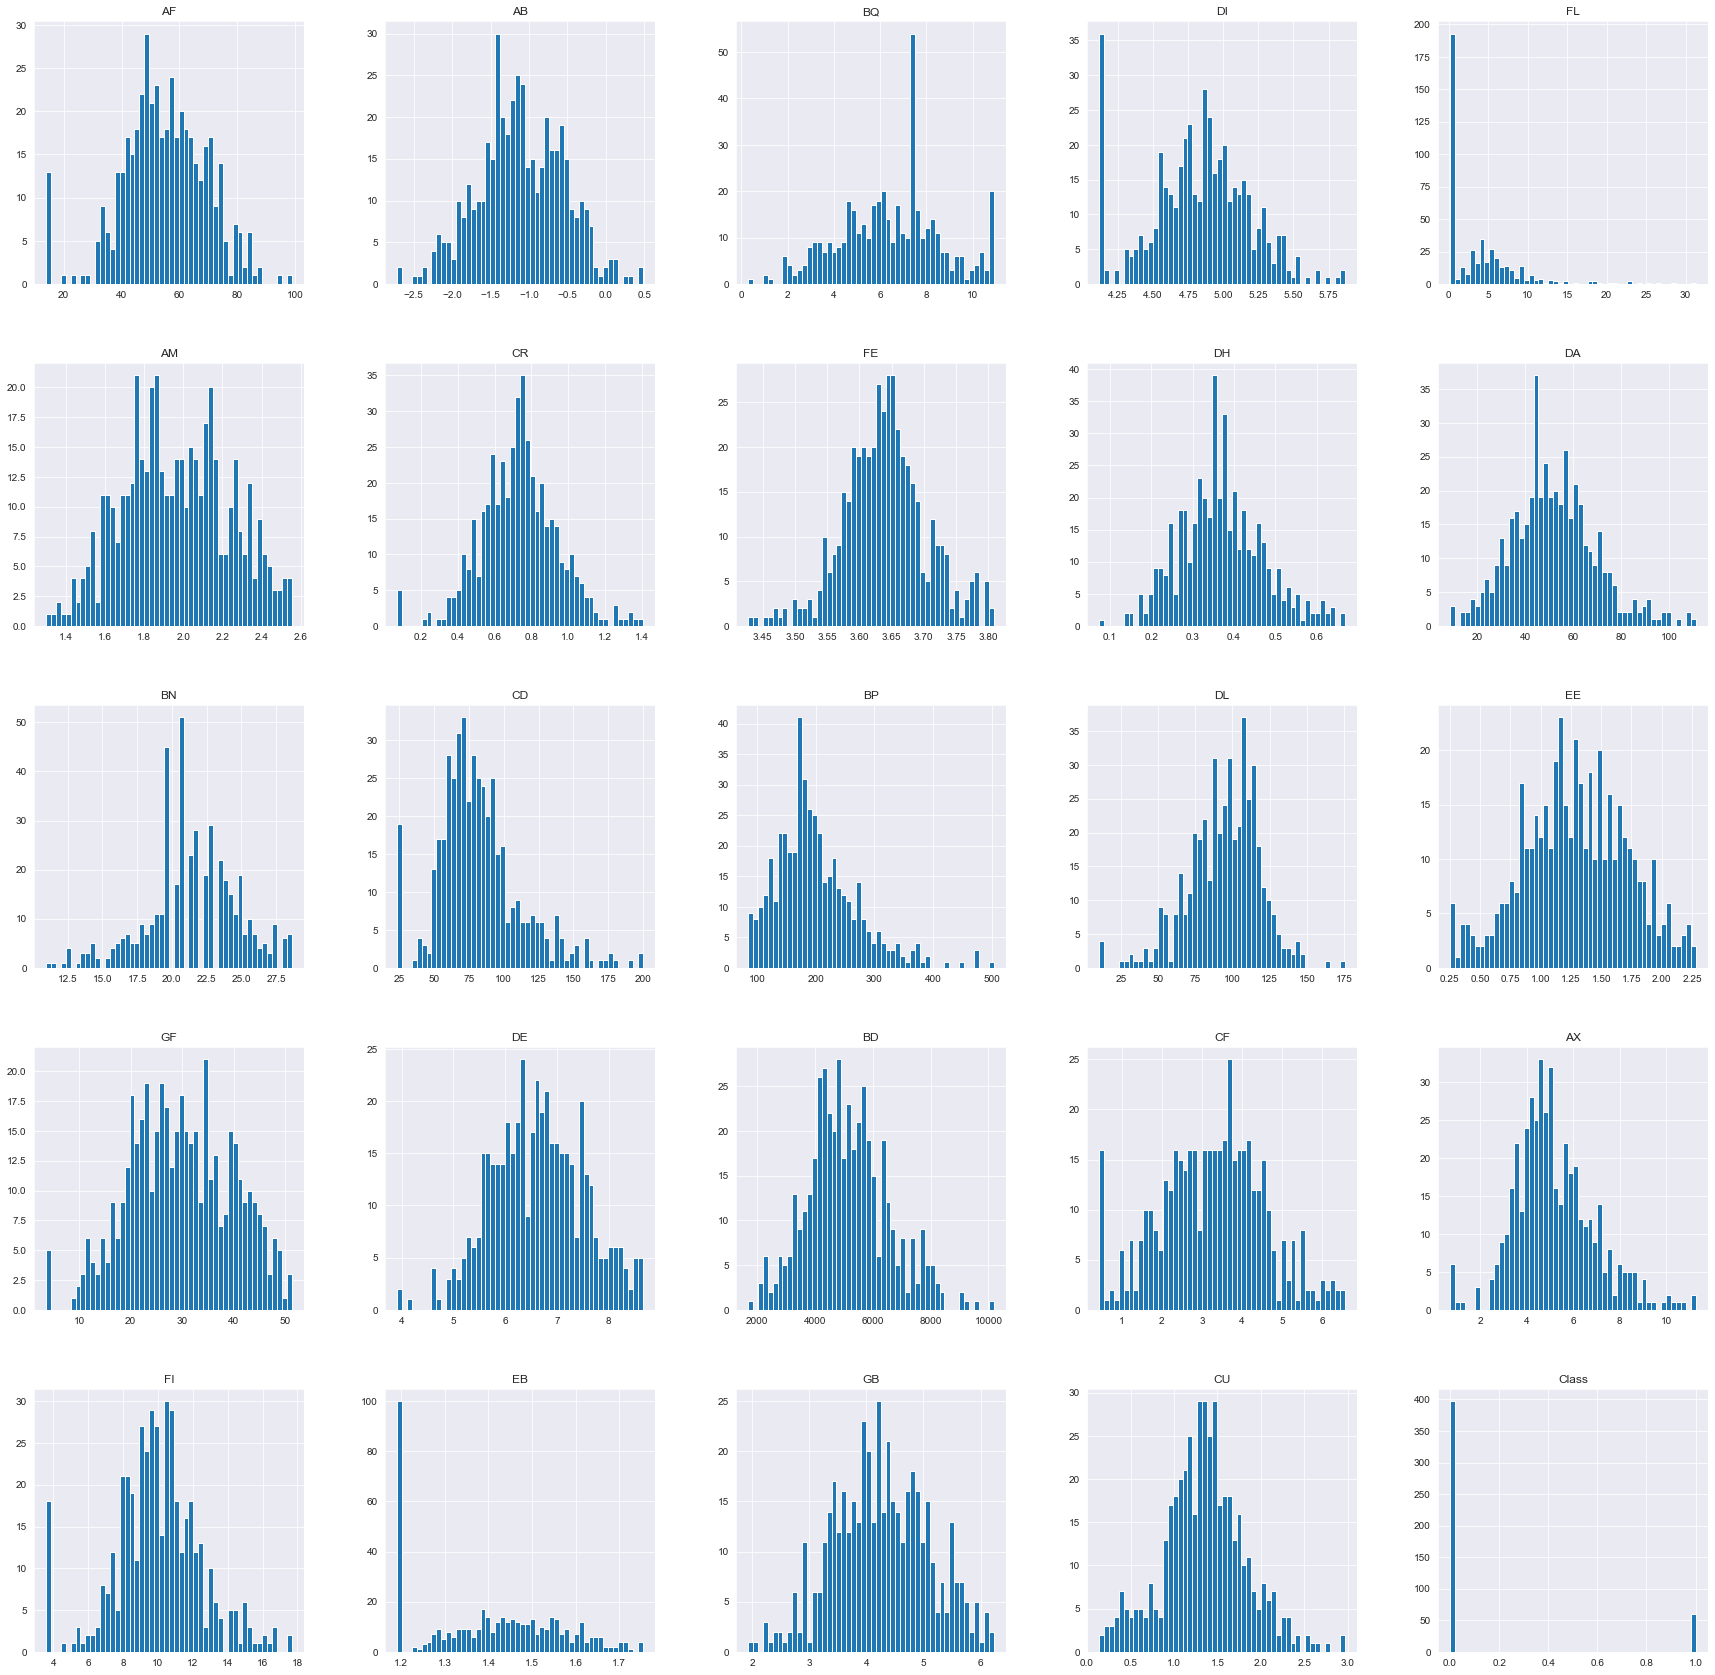

In [38]:
df.hist(figsize=(30,30), bins=50)